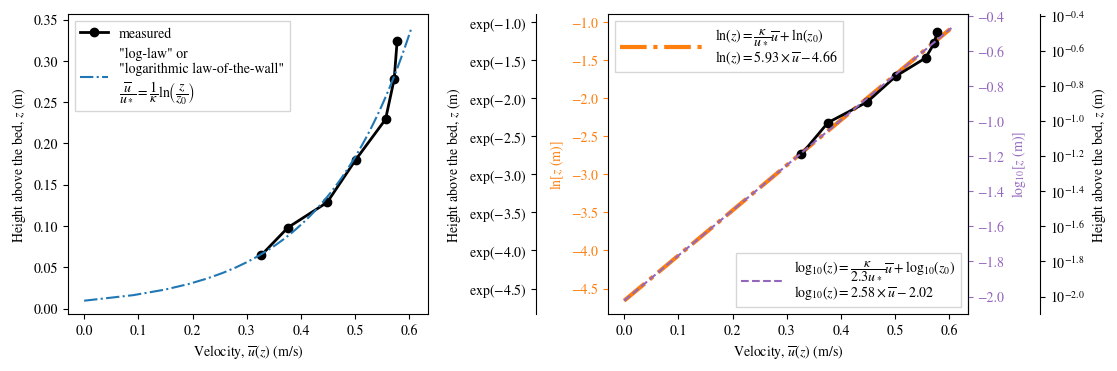

In [1]:
#########################################################
#########################################################
# Lecture 06 - Boundary Layers
# Created for CEE 474 / CEWA 574, Spring 2021
# By Jacob A. Morgan, Ph.D.
#    University of Washington
#########################################################
#########################################################
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rcParams.update({'font.size': 10})
plt.rcParams['font.family']=['STIXGeneral',
                             'Times New Roman',
                             'DejaVu Serif']
mpl.rcParams['mathtext.fontset'] = 'stix'
#########################################################
# Read velocity data from .csv files
u = np.genfromtxt('cee474_hw2_u.csv',delimiter=',',skip_header=1) # x-direction velocity (cm/s)
z = np.genfromtxt('cee474_hw2_z.csv',delimiter=',',skip_header=1) # z-coordiante (cm)
#########################################################
# Calculate mean velocity over a range
ind = np.arange(0,601)+2200 # range of indices
u_bar = np.mean(u[ind,:], axis=0)/100 # average downstream velocity (m/s)
z = z/100 # convert heights from cm to meters
#########################################################
# fit linear function (1st degree polynomial) in log-linear space
p = np.polyfit(np.log(z), u_bar, 1)
# invert the polynomial coefficients
pinv = np.array([1/p[0], -p[1]/p[0]])
pz = np.linspace(np.exp(pinv[1]),1.05*max(z))
pu = np.polyval(p,np.log(pz))
#########################################################
fig, (ax1, ax2loge) = plt.subplots(1, 2, figsize=(9,3),
                               dpi= 100, facecolor='w',
                               edgecolor='k')
ax1.plot(u_bar, z, '.-k', lw=2, ms=12, label='measured')
ax1.plot(pu, pz, '-.',
         label='"log-law" or\n"logarithmic law-of-the-wall"\n'+
              r'$\dfrac{\overline{u}}{u_*}=\dfrac{1}{\kappa}\ln\left(\dfrac{z}{z_0}\right)$')
ax1.set_ylabel('Height above the bed, $z$ (m)')
ax1.set_xlabel('Velocity, $\overline{u}(z)$ (m/s)')
ax1.legend(loc=0, fancybox=False)

ax2loge.plot(pu, np.log(pz), '-.', color='tab:orange', lw=3,
             label=r'$\ln(z)=\dfrac{\kappa}{u_*}\overline{u}+\ln(z_0)$'+
                    '\n'+r'$\ln(z)=%4.2f \times \overline{u}%4.2f$' % (pinv[0], pinv[1]))
ax2loge.set_ylabel('ln[$z$ (m)]', color='tab:orange')
ax2loge.set_xlabel('Velocity, $\overline{u}(z)$ (m/s)')
ax2loge.tick_params(colors='tab:orange', axis='y')

plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.,
                    wspace=0.5)

ax2e = ax2loge.twinx()
ax210 = ax2loge.twinx()
ax2log10 = ax2loge.twinx()

ax2e.plot(u_bar, np.log(z), '.-k', lw=2, ms=12, label='measured')
ax2log10.plot(pu, np.log10(pz), '--', color='tab:purple',
              label=r'$\log_{10}(z)=\dfrac{\kappa}{2.3u_*}\overline{u}+\log_{10}(z_0)$'+
                     '\n'+r'$\log_{10}(z)=%4.2f \times \overline{u}%4.2f$' % (pinv[0]/np.log(10), np.log10(np.exp(pinv[1]))))

ax2e.yaxis.set_ticks_position('left')
ax2e.yaxis.set_label_position('left')
ax2e.spines['left'].set_position(("axes", -0.2))
ax2e.set_yticks(plt.getp(ax2loge, 'yticks'))
ax2e.yaxis.set_major_formatter(ticker.FormatStrFormatter('$\exp(%3.1f)$'))
ax2e.set_ylim(plt.getp(ax2loge, 'ylim'))
ax2e.set_ylabel('Height above the bed, $z$ (m)')
ax2e.spines['right'].set_color(None)
ax2e.minorticks_off()

ax2log10.set_ylim(np.log10(np.exp(plt.getp(ax2loge, 'ylim'))))
ax2log10.set_ylabel('$\log_{10}$[$z$ (m)]', color='tab:purple')
ax2log10.tick_params(colors='tab:purple', axis='y')

ax210.spines['right'].set_position(("axes", 1.2))
ax210.set_yticks(plt.getp(ax2log10, 'yticks'))
ax210.yaxis.set_major_formatter(ticker.FormatStrFormatter('$10^{%2.1f}$'))
ax210.set_ylim(plt.getp(ax2log10, 'ylim'))
ax210.set_ylabel('Height above the bed, $z$ (m)')

for ax in (ax2e, ax210, ax2log10):
    ax.spines['top'].set_color(None)
    ax.spines['bottom'].set_color(None)
    ax.tick_params(axis='x', colors=None)
for ax in (ax210, ax2log10):
    ax.spines['left'].set_color(None)

ax2loge.legend(loc=0, handlelength=6, fancybox=False)
ax2log10.legend(loc=4, handlelength=3, fancybox=False)

plt.show()